<a href="https://colab.research.google.com/github/victormattos2013/Marketing-Investimento/blob/main/Victor_Mattos_Classificacao_Marketing_Investimento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação: Marketing em Investimentos

Neste projeto, iremos analisar dados de uma campanha de marketing para aderência de investimentos. O intuito é usar as informações dos dados para prever se os clientes de um banco vão aplicar o dinheiro em um investimento ou não.

Essa previsão será feita utilizando machine learning e este notebook vai conter os passos para se obter um modelo capaz de realizar as previsões, desde a **leitura**, **análise exploratória**, **separação** e **transformação** dos dados, até o **ajuste**, **avaliação** e **comparação** de modelos de classificação.

# Análise exploratória

## Fazendo a leitura dos dados

Podemos realizar a leitura dos dados a partir da biblioteca `pandas`. Por conta disso, vamos realizar a importação da biblioteca com o comando `import pandas as pd`.

Como o arquivo de dados está no formato *csv*, vamos realizar a leitura com a função [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

In [1]:
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import io

Para criar modelos de classificação, precisamos utilizar dados de qualidade, sem inconsistências e sem dados faltantes. Vamos checar se existem dados nulos e o tipo dos dados de cada coluna na base de dados a partir do método [`info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html).

In [2]:
# Load the dataset
url = "https://raw.githubusercontent.com/victormattos2013/Marketing-Investimento/main/marketing_investimento.csv"
dados = pd.read_csv(url)
dados.head()

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos,aderencia_investimento
0,45,casado (a),superior,nao,242,nao,587,1,sim
1,42,casado (a),medio,nao,1289,nao,250,4,sim
2,23,solteiro (a),superior,nao,363,nao,16,18,nao
3,58,divorciado (a),superior,nao,1382,nao,700,1,sim
4,50,casado (a),medio,nao,3357,nao,239,4,sim


## Explorando os dados

Uma etapa muito importante em projetos de machine learning é a exploração e entendimento dos dados, conhecida como **análise exploratória**. Podemos utilizar gráficos para verificar quais são as informações em cada uma das colunas da base de dados, identificar inconsistências e padrões que possam existir.

Vamos explorar cada uma das colunas da base de dados com o uso da biblioteca `plotly`. Vamos começar pelas variáveis categóricas e depois explorar as variáveis numéricas.

### Variáveis categóricas

In [3]:
import plotly.express as px

In [4]:
px.histogram(dados, x = 'aderencia_investimento', text_auto = True)

In [5]:
px.histogram(dados, x = 'estado_civil', text_auto = True, color = 'aderencia_investimento', barmode = 'group')

### Variáveis numéricas

In [6]:
px.box(dados, x = 'idade', color = 'aderencia_investimento')

# Tranformação de dados

## Variáveis explicativas e variável alvo

Para fazer a previsão dos valores com um modelo de machine learning, precisamos fazer a separação da variável alvo e variáveis explicativas. O y representa a variável que queremos prever, enquanto x representa todas as variáveis que serão utilizadas para explicar o comportamento de **y**.

In [7]:
x = dados.drop(['fez_emprestimo','inadimplencia','aderencia_investimento'], axis=1)

In [8]:
y = dados['aderencia_investimento'] #classes
y.head()

,aderencia_investimento
0,sim
1,sim
2,nao
3,sim
4,sim


## Transformando as variáveis explicativas

Os algoritmos de machine learning não compreendem dados no formato de texto, portanto devemos fazer transformações nos dados para o formato numérico para que o algoritmo consiga compreender as informações. Essa transformação precisa ser feita de forma que não altere a informação original do conjunto de dados, portanto não basta simplesmente alterar os valores para valores numéricos aleatórios.

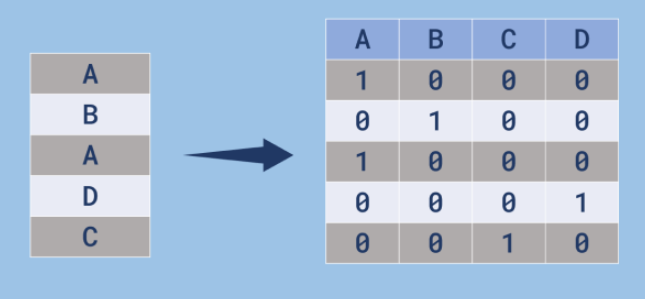

In [9]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [10]:
# prompt: faça transformações nos dados para o formato numérico para que o algoritmo consiga compreender as informações, também defina o df

# Assuming 'df' is a pandas DataFrame that needs to be transformed

# Identify categorical columns
categorical_cols = x.select_dtypes(include=['object']).columns

# Create a column transformer for numerical and categorical features
transformer = make_column_transformer(
    (StandardScaler(), x.select_dtypes(include=['number']).columns),
    (OneHotEncoder(), categorical_cols)
)

# Transform the data
df_transformed = transformer.fit_transform(x)

# If you want to have a DataFrame back, you can do:
#df_transformed = pd.DataFrame(df_transformed, columns=transformer.get_feature_names_out())


In [11]:
x.head()

,idade,estado_civil,escolaridade,saldo,tempo_ult_contato,numero_contatos
0,45,casado (a),superior,242,587,1
1,42,casado (a),medio,1289,250,4
2,23,solteiro (a),superior,363,16,18
3,58,divorciado (a),superior,1382,700,1
4,50,casado (a),medio,3357,239,4


## Transformando a variável alvo

Assim como as variáveis explicativas, a variável alvo também precisa ser alterada para o formato numérico. Podemos representar uma variável alvo binária como 0 ou 1, onde 0 indica ausência da característica da variável e 1 representa a presença da característica.

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
# Assuming 'df' is a pandas DataFrame that needs to be transformed and 'target_variable' is the name of the target variable column

# Identify categorical columns
categorical_cols = x.select_dtypes(include=['object']).columns

# Create a column transformer for numerical and categorical features
transformer = make_column_transformer(
    (StandardScaler(), x.select_dtypes(include=['number']).columns),
    (OneHotEncoder(), categorical_cols)
)

# Transform the data
df_transformed = transformer.fit_transform(x)

# If you want to have a DataFrame back, you can do:
#df_transformed = pd.DataFrame(df_transformed, columns=transformer.get_feature_names_out())

x.head()

# Transform the target variable
le = LabelEncoder()
y_transformed = le.fit_transform(y)

# Now y_transformed contains 0s and 1s representing the binary target variable


# Ajustando modelos

## Dividindo os dados entre treino e teste

Para compreender se o modelo está de fato aprendendo com os dados, precisamos fazer uma separação dos dados entre treinamento e teste. Os dados de **treinamento** são usados para ajustar o modelo, enquanto os dados de **teste** servem para verificar o aprendizado do modelo em dados que não foram utilizados no momento do ajuste.

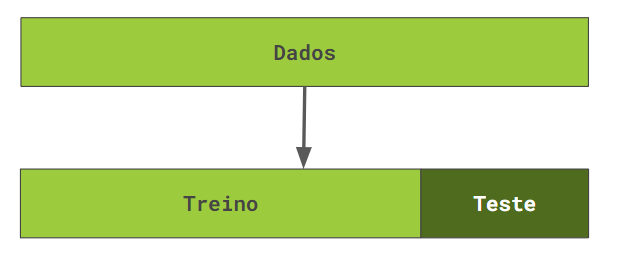

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(df_transformed, y_transformed, test_size=0.2, random_state=42)

# Crie uma instância do modelo que você deseja usar
model = LogisticRegression()  # Substitua pelo modelo desejado

# Treine o modelo
model.fit(X_train, y_train)


LogisticRegression()

In [16]:
# Faça previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calcule a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo:", accuracy)


Acurácia do modelo: 0.7204724409448819


## Modelo de base

O modelo mais simples de classificar os dados é simplesmente utilizar um algoritmo que chuta todas as classificações para a classe que tem maior frequência. Esse algoritmo serve como um critério de comparação, para identificar se os outros modelos tem um desempenho melhor do que a classificação mais simples possível.

In [17]:
from sklearn.dummy import DummyClassifier

In [18]:
dummy_stratified = DummyClassifier()      # Criar modelo
dummy_stratified.fit(X_train, y_train)  # Treina modelo
acuracia = dummy_stratified.score(X_test, y_test) * 100 # teste modelo (acurácia)
print("A acurácia do dummy stratified foi %.2f%%" % acuracia) #imprime acuracia

A acurácia do dummy stratified foi 60.24%


## Árvore de decisão

O modelo de árvore de decisão é muito utilizado pela sua alta **explicabilidade** e **processamento rápido**, mantendo um desempenho bem interessante.

Ele se baseia em decisões simples tomadas pelo algoritmo, separando os dados com base em comparações de **menor** e **maior** nos valores das colunas da base de dados.

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
# Árvore de Decisão
arvore = DecisionTreeClassifier()      # Criar modelo
arvore.fit(X_train, y_train)  # Treina modelo
acuracia = arvore.score(X_test, y_test) * 100 # teste modelo (acurácia)
print("A acurácia da árvore de decisão foi %.2f%%" % acuracia) #imprime acuracia


A acurácia da árvore de decisão foi 65.35%


In [21]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

```
nome_colunas = ['casado (a)',
                'divorciado (a)',
                'solteiro (a)',
                'fundamental',
                'medio',
                'superior',
                'inadimplencia',
                'fez_emprestimo',
                'idade',
                'saldo',
                'tempo_ult_contato',
                'numero_contatos']
```

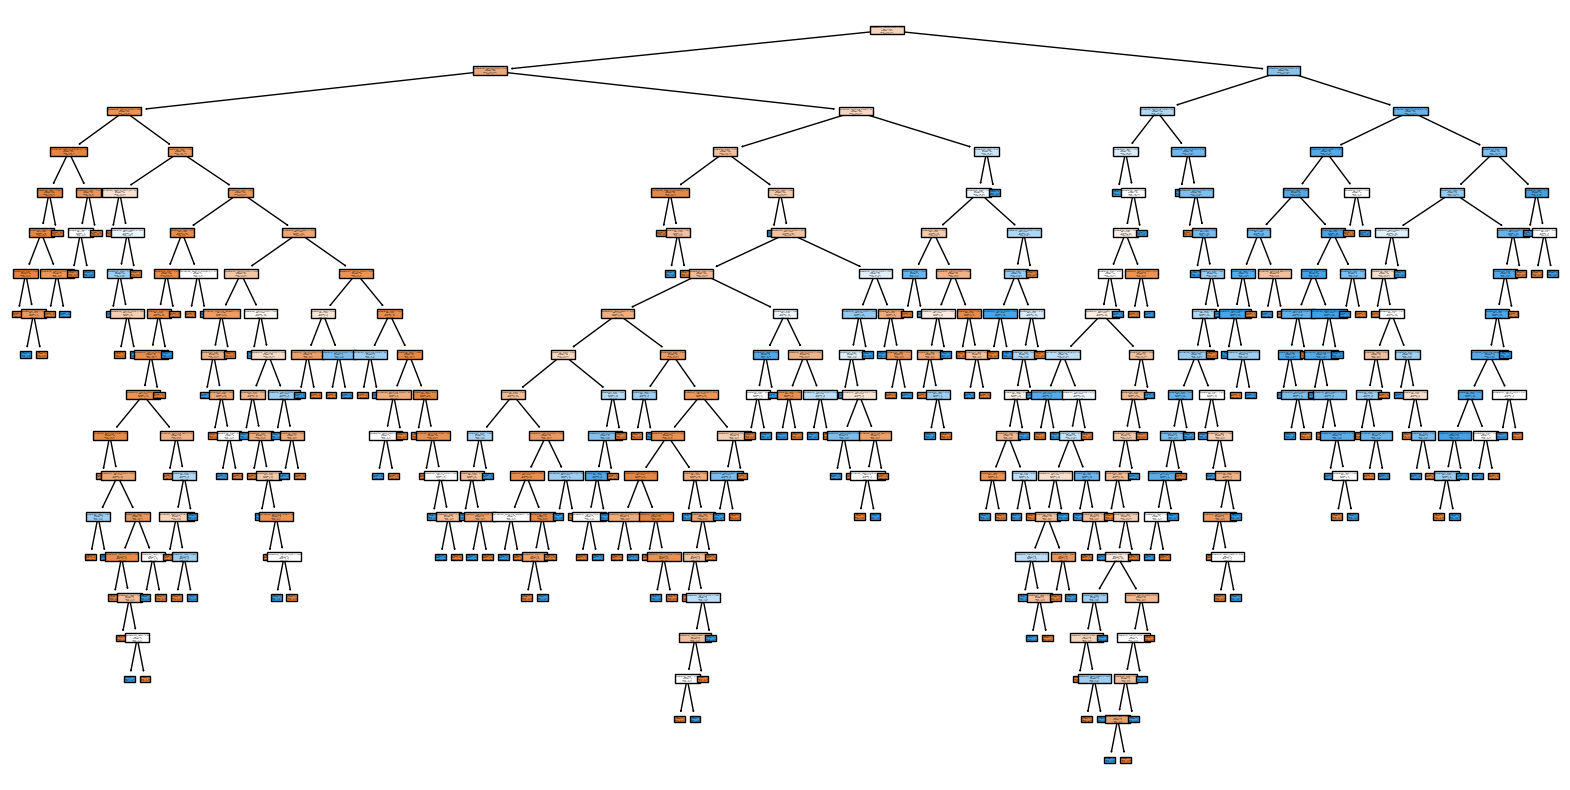

In [22]:
plt.figure(figsize=(20, 10))
plot_tree(arvore, filled=True, feature_names=transformer.get_feature_names_out(), class_names=['No', 'Yes'])
plt.show()

# Seleção de modelos

## Normalizando os dados

Alguns algoritmos podem atribuir um peso maior aos valores das variáveis devido a escala dos valores e não pela importância da classificação da variável alvo. Por exemplo, em uma base de dados com a colunas **idade** e **salário**, o algoritmo pode dar um peso de decisão maior para os valores do salário simplesmente por estar em uma escala maior do que os valores de idade, e não porque a variável salário é mais importante do que a variável idade.

Nesses casos, precisamos fazer uma transformação nos dados para que fiquem em uma mesma escala, fazendo com que o algoritmo não seja influenciado incorretamente pelos valores numéricos divergentes entre as variáveis.

$X_{sc} = \frac{X - X_{min}}{X_{max} - X_{min}} $

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
# Normalizando os dados com MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo de base (Dummy Classifier) com dados normalizados
dummy_stratified = DummyClassifier()
dummy_stratified.fit(X_train_scaled, y_train)
acuracia_dummy_scaled = dummy_stratified.score(X_test_scaled, y_test) * 100
print("A acurácia do dummy stratified com dados normalizados foi %.2f%%" % acuracia_dummy_scaled)

# Árvore de Decisão com dados normalizados
arvore = DecisionTreeClassifier()
arvore.fit(X_train_scaled, y_train)
acuracia_arvore_scaled = arvore.score(X_test_scaled, y_test) * 100
print("A acurácia da árvore de decisão com dados normalizados foi %.2f%%" % acuracia_arvore_scaled)


A acurácia do dummy stratified com dados normalizados foi 60.24%
A acurácia da árvore de decisão com dados normalizados foi 64.96%


## KNN

O algoritmo KNN se baseia no cálculo de distância entre os registros da base de dados e busca elementos que estejam próximos uns dos outros (vizinhos) para tomar a decisão da classificação.

Por conta de usar cálculos de distância, esse algoritmo é influenciado pela escala das variáveis e por conta disso é necessário uma transformação nos dados antes de utilizar esse método.

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
# KNN com dados normalizados
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
acuracia_knn_scaled = knn.score(X_test_scaled, y_test) * 100
print("A acurácia do KNN com dados normalizados foi %.2f%%" % acuracia_knn_scaled)


A acurácia do KNN com dados normalizados foi 67.72%


## Escolhendo e salvando o melhor modelo

Ao final de um projeto de machine learning, devemos comparar os resultados dos modelos e escolher aquele que tenha o melhor desempenho.


In [27]:
# Comparando as acurácias
print("Acurácia do Dummy Stratified (normalizado):", acuracia_dummy_scaled)
print("Acurácia da Árvore de Decisão (normalizado):", acuracia_arvore_scaled)
print("Acurácia do KNN (normalizado):", acuracia_knn_scaled)

# Encontrando o melhor modelo
melhor_modelo = max(acuracia_dummy_scaled, acuracia_arvore_scaled, acuracia_knn_scaled)

if melhor_modelo == acuracia_dummy_scaled:
  print("O melhor modelo foi o Dummy Stratified (normalizado).")
elif melhor_modelo == acuracia_arvore_scaled:
  print("O melhor modelo foi a Árvore de Decisão (normalizado).")
else:
  print("O melhor modelo foi o KNN (normalizado).")


Acurácia do Dummy Stratified (normalizado): 60.23622047244095
Acurácia da Árvore de Decisão (normalizado): 64.96062992125984
Acurácia do KNN (normalizado): 67.71653543307087
O melhor modelo foi o KNN (normalizado).


## Pickle Dump


Podemos armazenar o modelo em um arquivo serializado do tipo pickle para que seja utilizado em produção, ou seja, em dados do mundo real para atender as necessidades do problema que precisa ser resolvido.